<a href="https://colab.research.google.com/github/takaito1/EAS4821_S2024/blob/main/scripts/lab4_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 exercise
- regression and correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/drive/MyDrive/EAS2655_4821/boston.csv',
                 na_values='-999',index_col=0)
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
YEAR,,,,,,,,,,,,,
1872,NaN,NaN,26.5,46.6,59.3,68.9,75.7,73.0,64.4,51.9,40.6,23.1,53.0
1873,25.1,26.4,33.9,44.9,56.5,67.3,72.9,69.8,62.8,53.5,33.3,32.1,48.2
1874,30.5,27.0,34.4,38.8,55.5,66.1,72.9,68.1,64.4,53.2,41.6,31.3,48.6
1875,20.1,22.3,31.3,42.5,57.9,66.7,72.1,71.0,59.6,50.1,34.9,29.6,46.5
1876,30.7,27.5,33.5,43.9,54.6,68.9,74.0,70.3,59.9,48.3,41.4,22.2,47.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,30.7,33.5,39.1,51.7,57.8,68.2,78.7,74.1,68.0,57.4,42.8,37.2,53.3
2020,38.0,37.8,41.8,44.6,56.8,69.2,75.3,74.1,65.6,54.7,48.0,36.0,53.5
2021,31.0,30.8,42.0,50.8,61.4,74.4,72.4,76.9,69.7,59.9,44.7,39.2,54.4


In [12]:
# calculate regression line
JAN = df['JAN'][:]
year=np.arange(1872,2024,1)
#
gooddata = (np.isnan(JAN)==False)
c = np.cov(year[gooddata],JAN[gooddata])
a = c[0,1]/c[0,0]
b = np.mean(JAN[gooddata]) - a*np.mean(year[gooddata])
R2 = c[0,1]**2/(c[0,0]*c[1,1])
print('R2='+str(R2)[:5])

R2=0.042


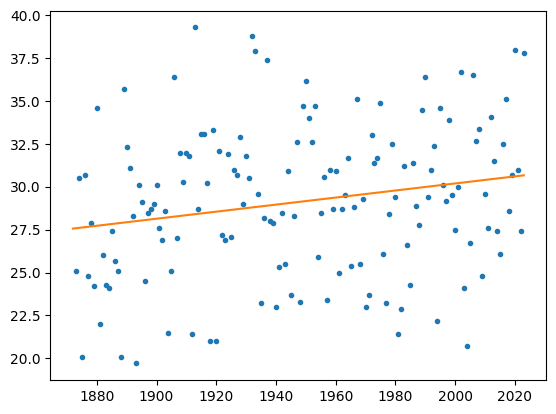

In [11]:
# plot the result
plt.plot(year,JAN,'.')
yest = a*year + b
plt.plot(year,yest,'-')
#


In [57]:
def regress_xy(x,y):
    # detect bad data and gooddata is true for good data
    gooddata = (np.isnan(y)==False)
    # calculate covariance matrix
    c=np.cov(x[gooddata],y[gooddata])
    # calculate a
    a=c[0,1]/c[0,0]
    # calculate b
    b=np.mean(y[gooddata])-a*np.mean(x[gooddata])
    # calculate R2
    R2=c[0,1]**2/(c[0,0]*c[1,1])
    # calculate residual
    re=y[gooddata] - (a*x[gooddata]+b)
    # calculate MSE
    MSE=np.mean(re**2)
    # output a, b, R2, MSE
    return a,b,R2,MSE

In [58]:
def effective_N(y):
    # detect bad data and gooddata is true for good data
    gooddata = (np.isnan(y)==False)
    # Effective sample size
    # create two time series with a lag (of equal length)
    ts0 = y[gooddata][:-1] # from 1st to the 2nd from the last
    ts1 = y[gooddata][1:]  # from 2nd to the last
    # evaluate the auto-correlation
    c=np.cov(ts0,ts1)
    r1=c[0,1]/np.sqrt(c[0,0]*c[1,1])
    #print('lag-autocorrelation  = '+str(r1)[:5])
    # original sample size
    N = np.size(y[gooddata])
    # effective sample size
    Neff = N*(1-r1)/(1+r1)
    #print(N,np.round(Neff))
    return Neff

In [59]:
months = ['JAN','FEB','MAR','APR','MAY',
          'JUN','JUL','AUG','SEP','OCT','NOV','DEC']
aout=np.zeros(12)
bout=np.zeros(12)
R2out=np.zeros(12)
MSE=np.zeros(12)
Neff = np.zeros(12)
for n,mon in enumerate(months):
    aout[n], bout[n], R2out[n], MSE[n] = regress_xy(year,df[mon])
    Neff[n] = effective_N(df[mon])
    #print(aout,bout,R2out)

<ipython-input-81-dc6155b9f958>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=months,rotation=60,fontsize=8)
<ipython-input-81-dc6155b9f958>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=months,rotation=60,fontsize=8)
<ipython-input-81-dc6155b9f958>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(labels=months,rotation=60,fontsize=8)
<ipython-input-81-dc6155b9f958>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(labels=months,rotation=60,fontsize=8)


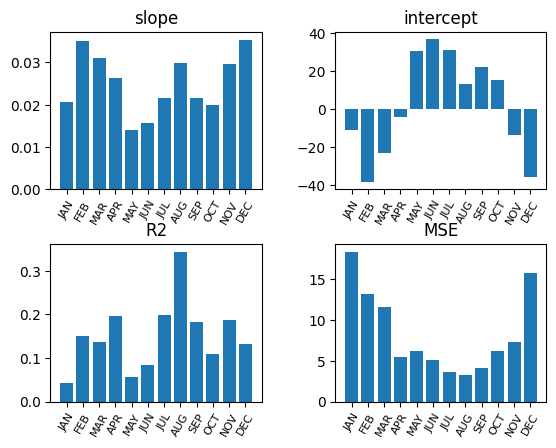

In [81]:
fig,ax=plt.subplots(2,2)
ax=ax.flatten()
plt.subplots_adjust(hspace=.35,wspace=.35)
ax[0].bar(months,aout)
ax[0].set_title('slope')
ax[0].set_xticklabels(labels=months,rotation=60,fontsize=8)
#
ax[1].bar(months,bout)
ax[1].set_title('intercept')
ax[1].set_xticklabels(labels=months,rotation=60,fontsize=8)
#
ax[2].bar(months,R2out)
ax[2].set_title('R2')
ax[2].set_xticklabels(labels=months,rotation=60,fontsize=8)
#
ax[3].bar(months,MSE)
ax[3].set_title('MSE')
ax[3].set_xticklabels(labels=months,rotation=60,fontsize=8)
plt.show()

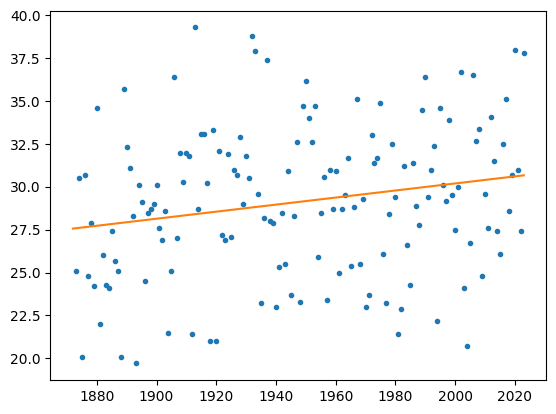

In [41]:
# Use pseudo inverse to calculate regression coeffs
N = np.size(year[gooddata])
A = np.ones((N,2))
# set up Ax = b problem
A[:,0]=year[gooddata]
# pseudo inverse of A (pinv) times b = regression coeffs
regr=np.linalg.pinv(A)@JAN[gooddata]
# plot
plt.plot(year,JAN,'.')
plt.plot(year,regr[0]*year+regr[1],'-')

In [50]:
# Effective sample size
# create two time series with a lag (of equal length)
ts0 = JAN[gooddata][:-1] # from 1st to the 2nd from the last
ts1 = JAN[gooddata][1:]  # from 2nd to the last
# evaluate the auto-correlation
c=np.cov(ts0,ts1)
r1=c[0,1]/np.sqrt(c[0,0]*c[1,1])
print('lag-autocorrelation  = '+str(r1)[:5])
# original sample size
N = np.size(JAN[gooddata])
# effective sample size
Neff = N*(1-r1)/(1+r1)
print(N,np.round(Neff))

lag-autocorrelation  = 0.007
151 149.0
